## **Logistic Regression - Exercise 1: Titanic Survival Prediction**
*Ngày 26 tháng 10 năm 2024*

### **1. Initial Setup**

#### *1.1 Import Required Libraries*

In [33]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization library
import matplotlib.pyplot as plt

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### *1.2. Load Dataset*

In [34]:
# Read the Titanic dataset
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

# Display first few rows and basic information
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [35]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


#### *1.3. Extract Features and Target*

In [36]:
# Convert DataFrame to numpy array
dataset_arr = df.to_numpy().astype(np.float64)

# Split into features (X) and target (y)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

# Add bias term to X
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

print("Feature matrix shape:", X_b.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (891, 9)
Target vector shape: (891,)


### **2. Data Preparation**

#### *2.1. Split Data into Train, Validation, and Test Sets*

In [37]:
# Set splitting parameters
val_size = 0.2    # 20% for validation
test_size = 0.125 # 12.5% for testing
random_state = 22  # For reproducibility
is_shuffle = True # Shuffle data before splitting

# First split: separate validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Second split: separate test set from training set
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Print shapes of resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (623, 9)
Validation set shape: (179, 9)
Test set shape: (89, 9)


#### *2.2. Normalize Features*

In [38]:
# Initialize the scaler
normalizer = StandardScaler()

# Fit and transform training data (excluding bias term)
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])

# Transform validation and test data using training set parameters
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

print("Feature statistics after normalization:")
print("Mean of training features:", np.mean(X_train[:, 1:], axis=0))
print("Std of training features:", np.std(X_train[:, 1:], axis=0))

Feature statistics after normalization:
Mean of training features: [-3.32532290e-16 -1.55751994e-16 -8.30439694e-17  6.77182583e-17
  3.67460654e-16  7.46861107e-16 -1.23318513e-16  9.30235022e-17]
Std of training features: [1. 1. 1. 1. 1. 1. 1. 1.]


### **3. Model Functions**

#### *3.1. Sigmoid Function*

In [39]:
def sigmoid(z):
    """
    Compute the sigmoid function.
    
    Args:
        z (np.array): Input values
        
    Returns:
        np.array: Sigmoid of input values
    """
    return 1 / (1 + np.exp(-z))

#### *3.2. Prediction Function*

In [40]:
def predict(X, theta):
    """
    Make predictions using logistic regression.
    
    Args:
        X (np.array): Input features
        theta (np.array): Model parameters
        
    Returns:
        np.array: Predicted probabilities
    """
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

#### *3.3. Loss Function*

In [41]:
def compute_loss(y_hat, y):
    """
    Compute binary cross-entropy loss.
    
    Args:
        y_hat (np.array): Predicted probabilities
        y (np.array): True labels
        
    Returns:
        float: Average loss value
    """
    # Clip predictions to avoid log(0)
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

#### *3.4. Gradient Computation*

In [42]:
def compute_gradient(X, y, y_hat):
    """
    Compute gradient for logistic regression.
    
    Args:
        X (np.array): Input features
        y (np.array): True labels
        y_hat (np.array): Predicted probabilities
        
    Returns:
        np.array: Gradient values
    """
    return np.dot(X.T, (y_hat - y)) / y.size

#### *3.5. Parameter Update Function*

In [43]:
def update_theta(theta, gradient, lr):
    """
    Update model parameters using gradient descent.
    
    Args:
        theta (np.array): Current parameters
        gradient (np.array): Computed gradient
        lr (float): Learning rate
        
    Returns:
        np.array: Updated parameters
    """
    return theta - lr * gradient

#### *3.6. Accuracy Computation*

In [44]:
def compute_accuracy(X, y, theta):
    """
    Compute prediction accuracy.
    
    Args:
        X (np.array): Input features
        y (np.array): True labels
        theta (np.array): Model parameters
        
    Returns:
        float: Accuracy score
    """
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

### **4. Model Training**

#### *4.1. Set Training Parameters*

In [45]:
# Define hyperparameters
lr = 0.01         # Learning rate
epochs = 100      # Number of training epochs
batch_size = 16   # Mini-batch size

# Initialize model parameters
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

# Initialize lists to store metrics
train_accs = []
train_losses = []
val_accs = []
val_losses = []

#### *4.2. Training Loop*

In [46]:
# Main training loop
for epoch in range(epochs):
    # Initialize batch metrics
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    
    # Mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        # Get current batch
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]
        
        # Forward pass
        y_hat = predict(X_i, theta)
        
        # Compute training loss
        train_loss = compute_loss(y_hat, y_i)
        
        # Compute gradient and update parameters
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        
        # Store batch metrics
        train_batch_losses.append(train_loss)
        
        # Compute accuracies
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        # Compute validation metrics
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    # Compute epoch metrics
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    # Store epoch metrics
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    
    # Print progress
    if (epoch + 1) % 1 == 0:  # Print every 10 epochs
        print(f'EPOCH {epoch + 1}:')
        print(f'Training Loss: {train_batch_loss:.3f}\tValidation Loss: {val_batch_loss:.3f}')
        print(f'Training Acc: {train_batch_acc:.3f}\tValidation Acc: {val_batch_acc:.3f}\n')

EPOCH 1:
Training Loss: 0.703	Validation Loss: 0.599
Training Acc: 0.656	Validation Acc: 0.710

EPOCH 2:
Training Loss: 0.670	Validation Loss: 0.582
Training Acc: 0.671	Validation Acc: 0.715

EPOCH 3:
Training Loss: 0.640	Validation Loss: 0.567
Training Acc: 0.685	Validation Acc: 0.720

EPOCH 4:
Training Loss: 0.614	Validation Loss: 0.555
Training Acc: 0.699	Validation Acc: 0.728

EPOCH 5:
Training Loss: 0.592	Validation Loss: 0.544
Training Acc: 0.706	Validation Acc: 0.744

EPOCH 6:
Training Loss: 0.572	Validation Loss: 0.535
Training Acc: 0.731	Validation Acc: 0.749

EPOCH 7:
Training Loss: 0.554	Validation Loss: 0.528
Training Acc: 0.747	Validation Acc: 0.744



EPOCH 8:
Training Loss: 0.539	Validation Loss: 0.522
Training Acc: 0.759	Validation Acc: 0.748

EPOCH 9:
Training Loss: 0.526	Validation Loss: 0.517
Training Acc: 0.765	Validation Acc: 0.744

EPOCH 10:
Training Loss: 0.514	Validation Loss: 0.513
Training Acc: 0.770	Validation Acc: 0.744

EPOCH 11:
Training Loss: 0.504	Validation Loss: 0.509
Training Acc: 0.773	Validation Acc: 0.750

EPOCH 12:
Training Loss: 0.495	Validation Loss: 0.507
Training Acc: 0.777	Validation Acc: 0.754

EPOCH 13:
Training Loss: 0.487	Validation Loss: 0.505
Training Acc: 0.780	Validation Acc: 0.754

EPOCH 14:
Training Loss: 0.480	Validation Loss: 0.503
Training Acc: 0.784	Validation Acc: 0.759

EPOCH 15:
Training Loss: 0.474	Validation Loss: 0.502
Training Acc: 0.788	Validation Acc: 0.759

EPOCH 16:
Training Loss: 0.468	Validation Loss: 0.501
Training Acc: 0.790	Validation Acc: 0.754

EPOCH 17:
Training Loss: 0.463	Validation Loss: 0.500
Training Acc: 0.790	Validation Acc: 0.754

EPOCH 18:
Training Loss: 0.459	V

### **5. Results Analysis**

#### *5.1. Visualize Training Results*

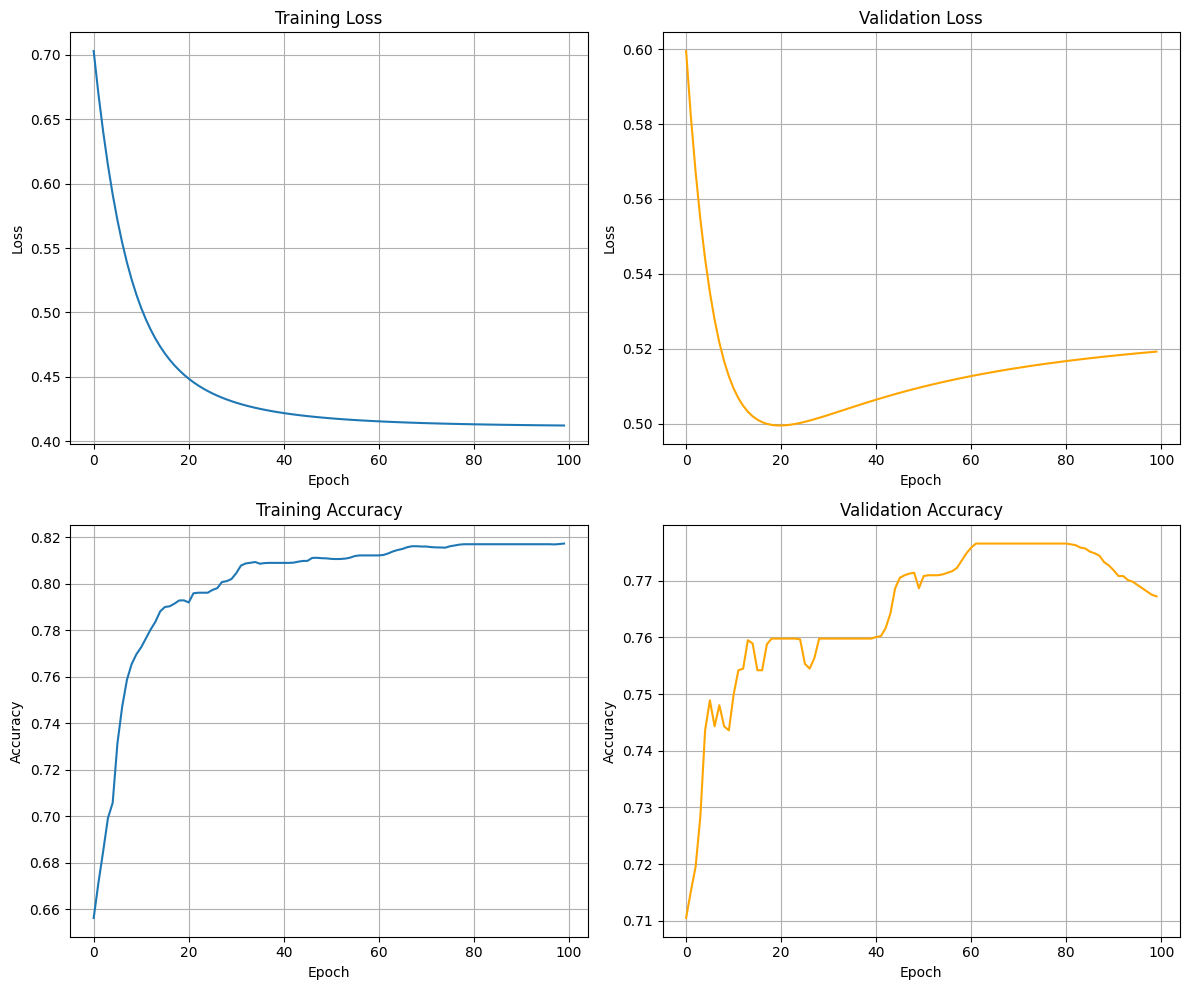

In [47]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 0].grid(True)

# Plot validation loss
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')
ax[0, 1].grid(True)

# Plot training accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')
ax[1, 0].grid(True)

# Plot validation accuracy
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

#### *5.2. Model Evaluation*

In [48]:
# Compute final metrics
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

# Print final results
print("Final Model Evaluation:")
print(f"Validation Accuracy: {val_set_acc:.3f}")
print(f"Test Accuracy: {test_set_acc:.3f}")

# Make predictions on test set
test_predictions = predict(X_test, theta)
print("\nFirst 10 sample predictions from test set:")
for i in range(10):
    print(f"True: {y_test[i]}, Predicted: {test_predictions[i]:.3f}")

Final Model Evaluation:
Validation Accuracy: 0.771
Test Accuracy: 0.775

First 10 sample predictions from test set:
True: 0.0, Predicted: 0.081
True: 0.0, Predicted: 0.295
True: 0.0, Predicted: 0.095
True: 0.0, Predicted: 0.189
True: 1.0, Predicted: 0.080
True: 1.0, Predicted: 0.253
True: 0.0, Predicted: 0.177
True: 0.0, Predicted: 0.083
True: 1.0, Predicted: 0.682
True: 1.0, Predicted: 0.171
